In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
1.[데이터 모델링,SQL 응용]

In [16]:
titanic=pd.read_csv("train.csv")
pclass=titanic['Pclass']
df_pclass=pd.DataFrame(pclass)

In [ ]:
1-1. Pclass 원핫인코딩하기

In [18]:
ohe=OneHotEncoder()
ohe.fit(df_pclass)
df_pclass

C:\Users\student\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [ ]:
1-3. embarked 원핫인코딩하기

In [21]:
embarked=titanic['Embarked']
df_embarked=pd.DataFrame(embarked)
df_embarked

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [ ]:
 1-2. Age를 이산화(5개)

In [33]:
age=titanic['Age']
age_refined=age.dropna()
Mage=age_refined.max()
mage=age_refined.min()
bins_age=np.linspace(Mage,mage,5)
Qa1=np.percentile(age_refined,20)
Qa2=np.percentile(age_refined,40)
Qa3=np.percentile(age_refined,60)
Qa4=np.percentile(age_refined,80)
df_age_refined=pd.DataFrame(age_refined)

In [34]:
df_age_refined['5bins']=np.where(df_age_refined>=Qa4,'very old',
                             np.where(df_age_refined>=Qa3,'old',
                                     np.where(df_age_refined>=Qa2,'youth',
                                             np.where(df_age_refined>=Qa1,'young','very young'))))
df_age_refined

,Age,5bins
0,22.0,young
1,38.0,old
2,26.0,youth
3,35.0,old
4,35.0,old
...,...,...
885,39.0,old
886,27.0,youth
887,19.0,young
889,26.0,youth


In [260]:
Survived=titanic[titanic['Survived']==1]
Dead=titanic[titanic['Survived']==0]
type(Dead)

pandas.core.frame.DataFrame

In [267]:
survived_refined=Survived['Age'].dropna()
dead_refined=Dead['Age'].dropna()
Survived_refined=pd.DataFrame(survived_refined)
Dead_refined=pd.DataFrame(dead_refined)

In [268]:
Survived_refined['labels']=np.where( Survived_refined>=60,'노년',
                             np.where(Survived_refined>=40,'장년',
                                     np.where(Survived_refined>=30,'중년',
                                             np.where(Survived_refined>=20,'청년',
                                                      np.where(Survived_refined>5,'미성년자','아기')))))
Survived_refined

,Age,labels
1,38.0,중년
2,26.0,청년
3,35.0,중년
8,27.0,청년
9,14.0,미성년자
...,...,...
875,15.0,미성년자
879,56.0,장년
880,25.0,청년
887,19.0,미성년자


In [269]:
Dead_refined['labels']=np.where(Dead_refined>=60,'노년',
                             np.where(Dead_refined>=40,'장년',
                                     np.where(Dead_refined>=30,'중년',
                                             np.where(Dead_refined>=20,'청년',
                                                      np.where(Dead_refined>5,'미성년자','아기')))))
Dead_refined

,Age,labels
0,22.0,청년
4,35.0,중년
6,54.0,장년
7,2.0,아기
12,20.0,청년
...,...,...
883,28.0,청년
884,25.0,청년
885,39.0,중년
886,27.0,청년


In [ ]:
(2) 생존자와 사망자의 연령대별 비율 구하기 

In [288]:
survived_rf=Survived['Age'].dropna()
dead_rf=Dead['Age'].dropna()
survived_cuted=pd.cut(survived_rf,bins,labels=labels)
print(survived_cuted.value_counts()/survived_cuted.value_counts().sum())
print("="*50)
dead_cuted=pd.cut(dead_rf,bins,labels=labels)
print(dead_cuted.value_counts()/dead_cuted.value_counts().sum())


청년      0.324324
중년      0.266409
미성년자    0.196911
장년      0.193050
노년      0.019305
Name: Age, dtype: float64
청년      0.355231
중년      0.209246
미성년자    0.204380
장년      0.189781
노년      0.041363
Name: Age, dtype: float64


In [ ]:
2. [기초 알고리즘]

In [ ]:
(1) 길이가 10인 1벡터

In [80]:
a=np.ones(10)
a

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
(2) 다섯번째 원소만 1이고 나머지 0인 벡터

In [86]:
a[:4]=0

In [87]:
a[5:]=0

In [88]:
a

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [ ]:
(3) 10부터 20까지의 값을 갖는 벡터

In [289]:
a1=np.arange(10,21)
a1

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [ ]:
(4) 순서바꾸기

In [293]:
ar=a1[::-1]
ar

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10])

In [ ]:
(5) 2x4행렬 만들기

In [93]:
b=np.arange(8)

In [94]:
b.reshape(2,4)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [ ]:
(6) 짝수인 원소 선택해 벡터만들기

In [96]:
c=np.array([1,2,0,0,4,0])

In [102]:
c[c%2==0]

array([2, 0, 0, 4, 0])

In [ ]:
(7) 단위행렬만들기

In [104]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [ ]:
(8),(9),(10) 난수 원소를 갖는 행렬의 최대, 최소, 평균값 구하기

In [208]:
d=np.random.randn(9)
e=d.reshape(3,3)
print(e)
print("="*50)
print(e.max())
print(e.min())
print("="*50)
print(e.mean(axis=0))
print(e.mean(axis=1))

[[-0.10380545 -0.0137428  -0.63042376]
 [ 0.27920122  0.9271351  -0.16869627]
 [ 0.62896186  0.00966426  0.45529943]]
0.9271351029303249
-0.6304237615066542
[ 0.26811921  0.30768552 -0.11460687]
[-0.249324    0.34588002  0.36464185]


In [ ]:
3.[Microsoft R 서버를 활용한 빅데이터 분석]
 (1) tips의 column 문자열 변환

In [117]:
import pandas as pd
import seaborn as sns

In [297]:
tips=sns.load_dataset("tips")

In [144]:
tips_sex=tips['sex'].astype('str')

In [147]:
df_tips_sex=pd.DataFrame(tips_sex)

In [148]:
df_tips_sex.info

<bound method DataFrame.info of         sex
0    Female
1      Male
2      Male
3      Male
4    Female
..      ...
239    Male
240  Female
241    Male
242    Male
243  Female

[244 rows x 1 columns]>

In [ ]:
(2) 특정 값 'missing'으로 변경하기

In [298]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [155]:
tips.iloc[1,1]='missing'

In [299]:
tips.iloc[[1,3,5,7],1]='missing'

In [300]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,missing,Male,No,Sun,Dinner,3
2,21.01,3.5,Male,No,Sun,Dinner,3
3,23.68,missing,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2,Female,Yes,Sat,Dinner,2
241,22.67,2,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
(3) scikitlearn에 있는 preprocessing중 표준화 정규화와 관련있는 함수
: MinMaxScaler,minmax_scale : 최소값을 0, 최댓값을 1로 만들어주고
        다른 변수들이 그 사이에 들어가도록 변환해주는 함수
    Binarizer: 변수들을 이항변수화 해주는 함수
    OneHotEncoder: 변수들을 0과 1로 변환해주는 함수
    RobustScaler: 중앙값(median):0 이고 IQR이 1이 되도록 변환해주는 함수
    StandardScaler().fit_transform(): 평균이0이고 표준편차가1인 표준정규분포를 따르도록
        바꾸어주는 함수

In [ ]:
2. 표준화와 정규화의 차이
"""
정규화:0~1 사이의 범위로 데이터를 표준화
5 3 1 7 9 => 0~1 로 표시하고 싶음 =>  (해당 숫자x -최솟값1) / (최댓값9-최솟값1) 
"""
"""
표준화: 표준정규분포를 따르도록 각 변수에서 평균을 빼고 표준편차로 나눈다
1,3,5,7,9 => (각 변수- 평균(5))/ (표준편차)
"""
정규화의 경우 최댓값과 최소값의 차이로 나누기 때문에 상대적인 크기에 대한 영향이
적고 평균으로부터 얼마나 떨어져 있는지 알기 힘들 수 있다.(예: 대부분의 값이 10이하인데
                                 최댓값이 2000인 경우)
표준화의 경유 표준정규분포로 표시하기 때문에 평균으로 부터 얼마나 떨어져 있는지를 알기
쉬운 장점이 있다.또한 특정 범위를 벗어난 경우 outlier로 간주할 수 있다.

In [ ]:
3. 데이터 분석을 위해 필요로 하는 라이브러리 및 용도
*numpy: 여러 수학적 함수들과 데이터들의 벡터화 등에 쓰인다.
*pandas: 파일을 읽고 DataFrame을 만들때 쓰인다.    
*matplotlib.pyplot: 데이터의 시각화에 필요한 그래프들을
    그릴 때 쓰인다.
*datetime: datetime형태의 데이터를 읽고 활용할 때 쓰인다.
*seaborn: matplotlib를 기반으로 다양한 테마와 통계용 차트를 
    그릴 때 쓰인다.

In [ ]:
4. [파이썬 기본문법과 통계기초]

In [167]:
Money=int(input())
type(Money)
def divider(Money):
    if Money>500:
        print("500원:",Money//500)
        if Money%500>100:
            print("100원:",Money%500//100)
            if (Money%500)%100>10:
                print("10원:",((Money%500)%100)//10)
                print("나머지:",((Money%500)%100)%10)

divider(Money)    

7777
500원: 15
100원: 2
10원: 7
나머지: 7


In [ ]:
5. [파이썬 패키지를 활용한 데이터 시각화]

In [ ]:
train=pd.read_csv("trainbike.csv",parse_dates=["datetime"])

In [193]:
trainbike=pd.read_csv('trainbike.csv',parse_dates=["datetime"])
bike=trainbike.copy()

In [194]:
import datetime as dt

In [198]:
bike['year']=bike['datetime'].dt.year
bike['month']=bike['datetime'].dt.month
bike['day']=bike['datetime'].dt.day
bike['hour']=bike['datetime'].dt.hour
bike['minute']=bike['datetime'].dt.minute
bike['second']=bike['datetime'].dt.second

In [196]:
bike['dayofweek']=bike['datetime'].dt.dayofweek

In [200]:
import matplotlib.pyplot as plt

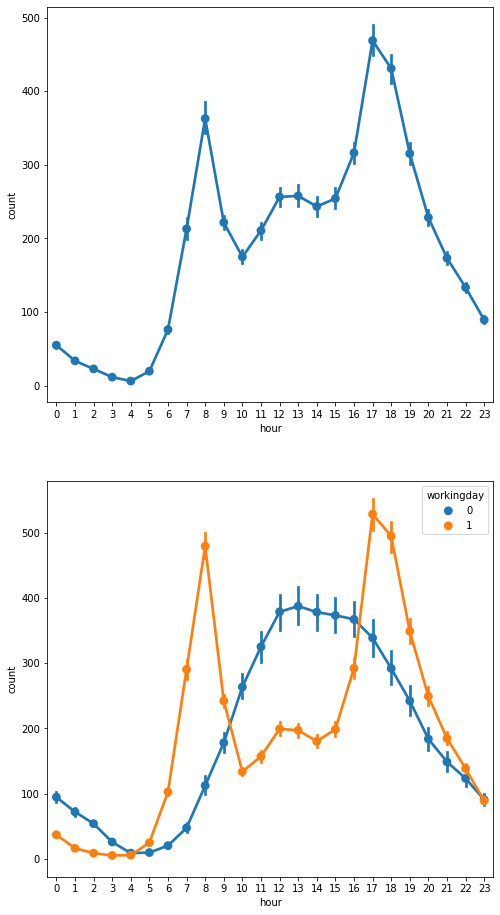

In [202]:
fig,(ax1,ax2)=plt.subplots(nrows=2)
fig.set_size_inches(8,16)
sns.pointplot(data=bike,x='hour',y='count',ax=ax1)
sns.pointplot(data=bike,x='hour',y='count',hue='workingday',ax=ax2)